<a href="https://colab.research.google.com/github/SeniraVinwath/breast-cancer-ml-analysis/blob/main/NoteBook3_20220997.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the pandas library
import pandas as pd

# Load the dataset from the Preprocessed CSV file
data_frame = pd.read_csv('/content/classification_data.csv')

# Display the first 5 rows of the dataset
data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,0.288136,0,3,2,3,1,1,1,0.949640,1,1,0.416667,0.066667,1
1,0.644068,0,1,3,5,3,3,1,0.136691,1,0,0.150000,0.200000,0
2,0.254237,0,1,1,1,2,2,1,0.136691,1,1,0.416667,0.022222,1
3,0.186441,0,2,2,3,2,2,1,0.244604,1,1,0.366667,0.066667,1
4,0.474576,0,2,1,2,3,3,1,0.338129,1,1,0.183333,0.022222,0


In [ ]:
# Selecting the subset of relevant feature columns to use as independent variables
X = data_frame[['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']]

# Select the dependent variable
y = data_frame['Mortality_Status']

In [ ]:
# Listing all feature column names in the feature set X
list(X.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive']

In [ ]:
# Getting the name of the target variable y
y.name

'Mortality_Status'

In [ ]:
# Splitting the dataset into training and testing sets
# 40% of the data is used for testing
# Stratify ensures the class distribution remains consistent in both sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43, stratify=y)

In [ ]:
# Import the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model using default parameters
logistic_model = LogisticRegression()

In [ ]:
# Fit (train) the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = logistic_model.predict(X_test)

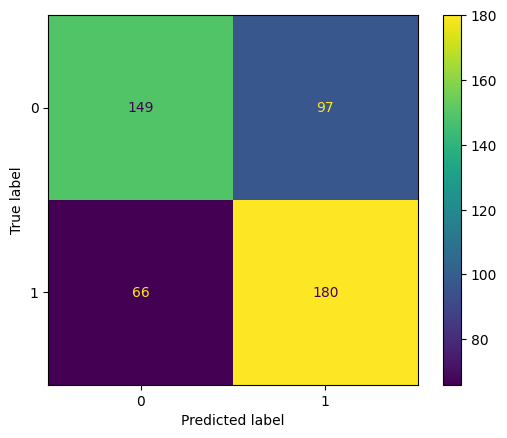

In [ ]:
# Import necessary metrics for confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix using actual and predicted labels
cm = confusion_matrix(y_test, y_pred, labels=logistic_model.classes_)

# Create a display object for the confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)

# Plot the confusion matrix
disp.plot()

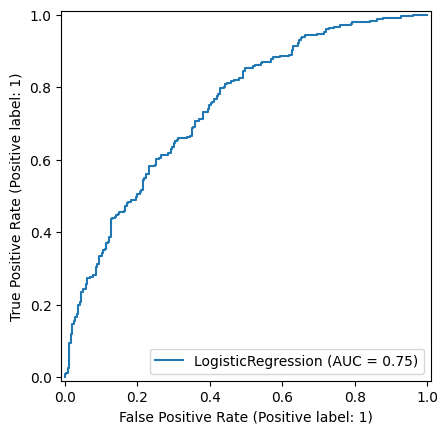

In [ ]:
# Import the ROC curve display utility
from sklearn.metrics import RocCurveDisplay

# Plot the ROC Curve for the logistic regression model using the test data
roc = RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)

In [ ]:
# Import the classification report function to evaluate model performance
from sklearn.metrics import classification_report

# Print the classification report including precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       246
           1       0.65      0.73      0.69       246

    accuracy                           0.67       492
   macro avg       0.67      0.67      0.67       492
weighted avg       0.67      0.67      0.67       492



In [ ]:
# Import the Gaussian Naive Bayes classifier from sklearn
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train (fit) the model using the training features and corresponding labels
naive_bayes_model.fit(X_train, y_train)

# Predict the target values (Mortality_Status) for the test feature set
y_pred = naive_bayes_model.predict(X_test)

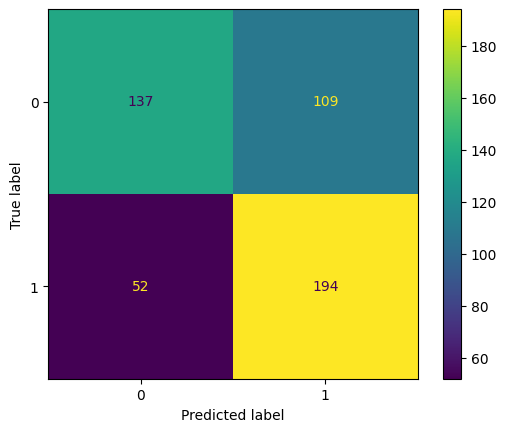

In [ ]:
# Generate the confusion matrix using the test labels and predicted labels
nb_conf_matrix = confusion_matrix(y_test, y_pred, labels=naive_bayes_model.classes_)

# Create a ConfusionMatrixDisplay object with the confusion matrix
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix, display_labels=naive_bayes_model.classes_)

# Plot the confusion matrix
nb_disp.plot()

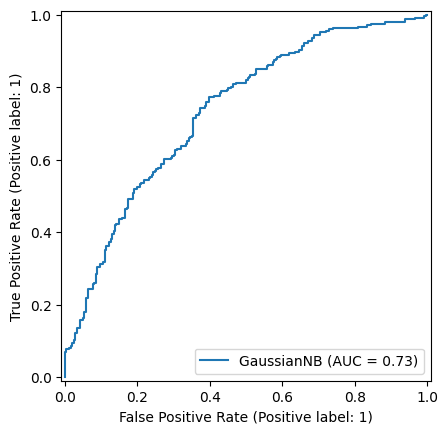

In [ ]:
# Import RocCurveDisplay to visualize the ROC curve
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve for the trained Naive Bayes model
naive_bayes_roc = RocCurveDisplay.from_estimator(naive_bayes_model, X_test, y_test)

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       246
           1       0.64      0.79      0.71       246

    accuracy                           0.67       492
   macro avg       0.68      0.67      0.67       492
weighted avg       0.68      0.67      0.67       492



In [ ]:
# Importing the VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Defining a list of base learners.
base_learners = [('NB', naive_bayes_model), ('LR', logistic_model)]

# Creating the ensemble learner by combining the base learners
# The voting parameter specifies the method to combine predictions
# soft means using the probabilities of the models for prediction
ensemble_learner = VotingClassifier(base_learners, voting='soft')

In [ ]:
# Fitting the ensemble learner to the training data.
# This trains the individual base models on the X_train and y_train data.
ensemble_learner = ensemble_learner.fit(X_train, y_train)

# Making predictions on the test data using the trained ensemble model.
y_pred_ensembler = ensemble_learner.predict(X_test)

In [ ]:
# Printing the classification report for the ensemble model's predictions.
print("Classification report for Ensembler")
print(classification_report(y_test, y_pred_ensembler))

Classification report for Ensembler
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       246
           1       0.65      0.79      0.71       246

    accuracy                           0.68       492
   macro avg       0.69      0.68      0.68       492
weighted avg       0.69      0.68      0.68       492



confusion_matrix for ensember learner


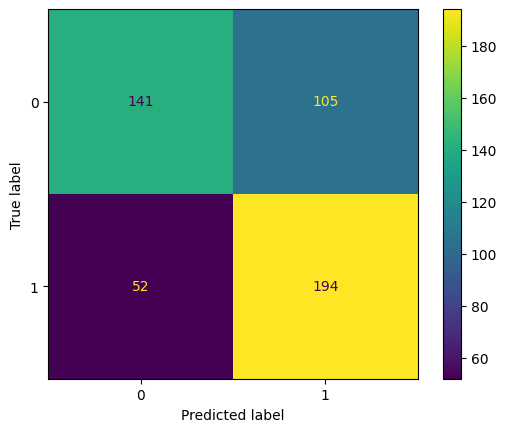

In [ ]:
# Printing the confusion matrix for the ensemble model's predictions.
# false positive, and false negative predictions for each class (Alive and Dead).
print("confusion_matrix for ensember learner")

# Compute the confusion matrix based on the true labels (y_test) and the predicted labels (y_pred_ensembler).
ensemble_learner_cm = confusion_matrix(y_test, y_pred_ensembler)

# Create and plot the confusion matrix display.
disp = ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm, display_labels=ensemble_learner.classes_)
disp.plot()

In [ ]:
regression_data = pd.read_csv('/content/regression_data.csv')
regression_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
0,0.169492,0,2,1,2,2,2,1,0.208633,1,1,0.133333,0.000000,0.122642
1,0.644068,0,1,1,1,2,2,1,0.086331,1,1,0.133333,0.000000,0.594340
2,0.457627,0,3,3,5,2,2,1,0.496403,1,1,0.183333,0.244444,0.386792
3,0.203390,0,1,3,5,2,2,1,0.057554,0,0,0.233333,0.022222,0.358491
4,0.627119,0,1,1,1,2,2,1,0.086331,1,1,0.250000,0.044444,0.556604


In [ ]:
# These features are used to predict the target variable (Survival_Months).
X = regression_data[['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage',
                   'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']]

# This variable represents the survival months, which the model will attempt to predict.
y = regression_data['Survival_Months']

In [ ]:
# Printing the shape of the dataframe
print('Data Shape', regression_data.shape)

Data Shape (615, 14)


In [ ]:
# Displaying summary of the DataFrame
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     615 non-null    float64
 1   Sex                     615 non-null    int64  
 2   T_Stage                 615 non-null    int64  
 3   N_Stage                 615 non-null    int64  
 4   6th_Stage               615 non-null    int64  
 5   Differentiated          615 non-null    int64  
 6   Grade                   615 non-null    int64  
 7   A_Stage                 615 non-null    int64  
 8   Tumor_Size              615 non-null    float64
 9   Estrogen_Status         615 non-null    int64  
 10  Progesterone_Status     615 non-null    int64  
 11  Regional_Node_Examined  615 non-null    float64
 12  Regional_Node_Positive  615 non-null    float64
 13  Survival_Months         615 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 67.4

In [ ]:
# Splitting the dataset into training and testing sets
# X contains the feature variables, and y contains the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Importing the DecisionTreeRegressor class
from sklearn.tree import DecisionTreeRegressor

# Initializing the model object
DT1_regressor = DecisionTreeRegressor()

In [ ]:
# Fit the Decision Tree Regressor using the training data.
DT1_regressor.fit(X_train, y_train)

# Use the trained model to predict the target values for the test set.
y_pred = DT1_regressor.predict(X_test)

# Print the depth (number of levels)
print("Decision Tree Levels: ", DT1_regressor.tree_.max_depth)

Decision Tree Levels:  20


In [ ]:
# Import the metrics module from sklearn
from sklearn import metrics

# Calculate and print the Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate and print the Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Calculate and print the R² score
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 0.25882136731193334
MSE: 0.10135730236299834
R2: -0.5974500164423489


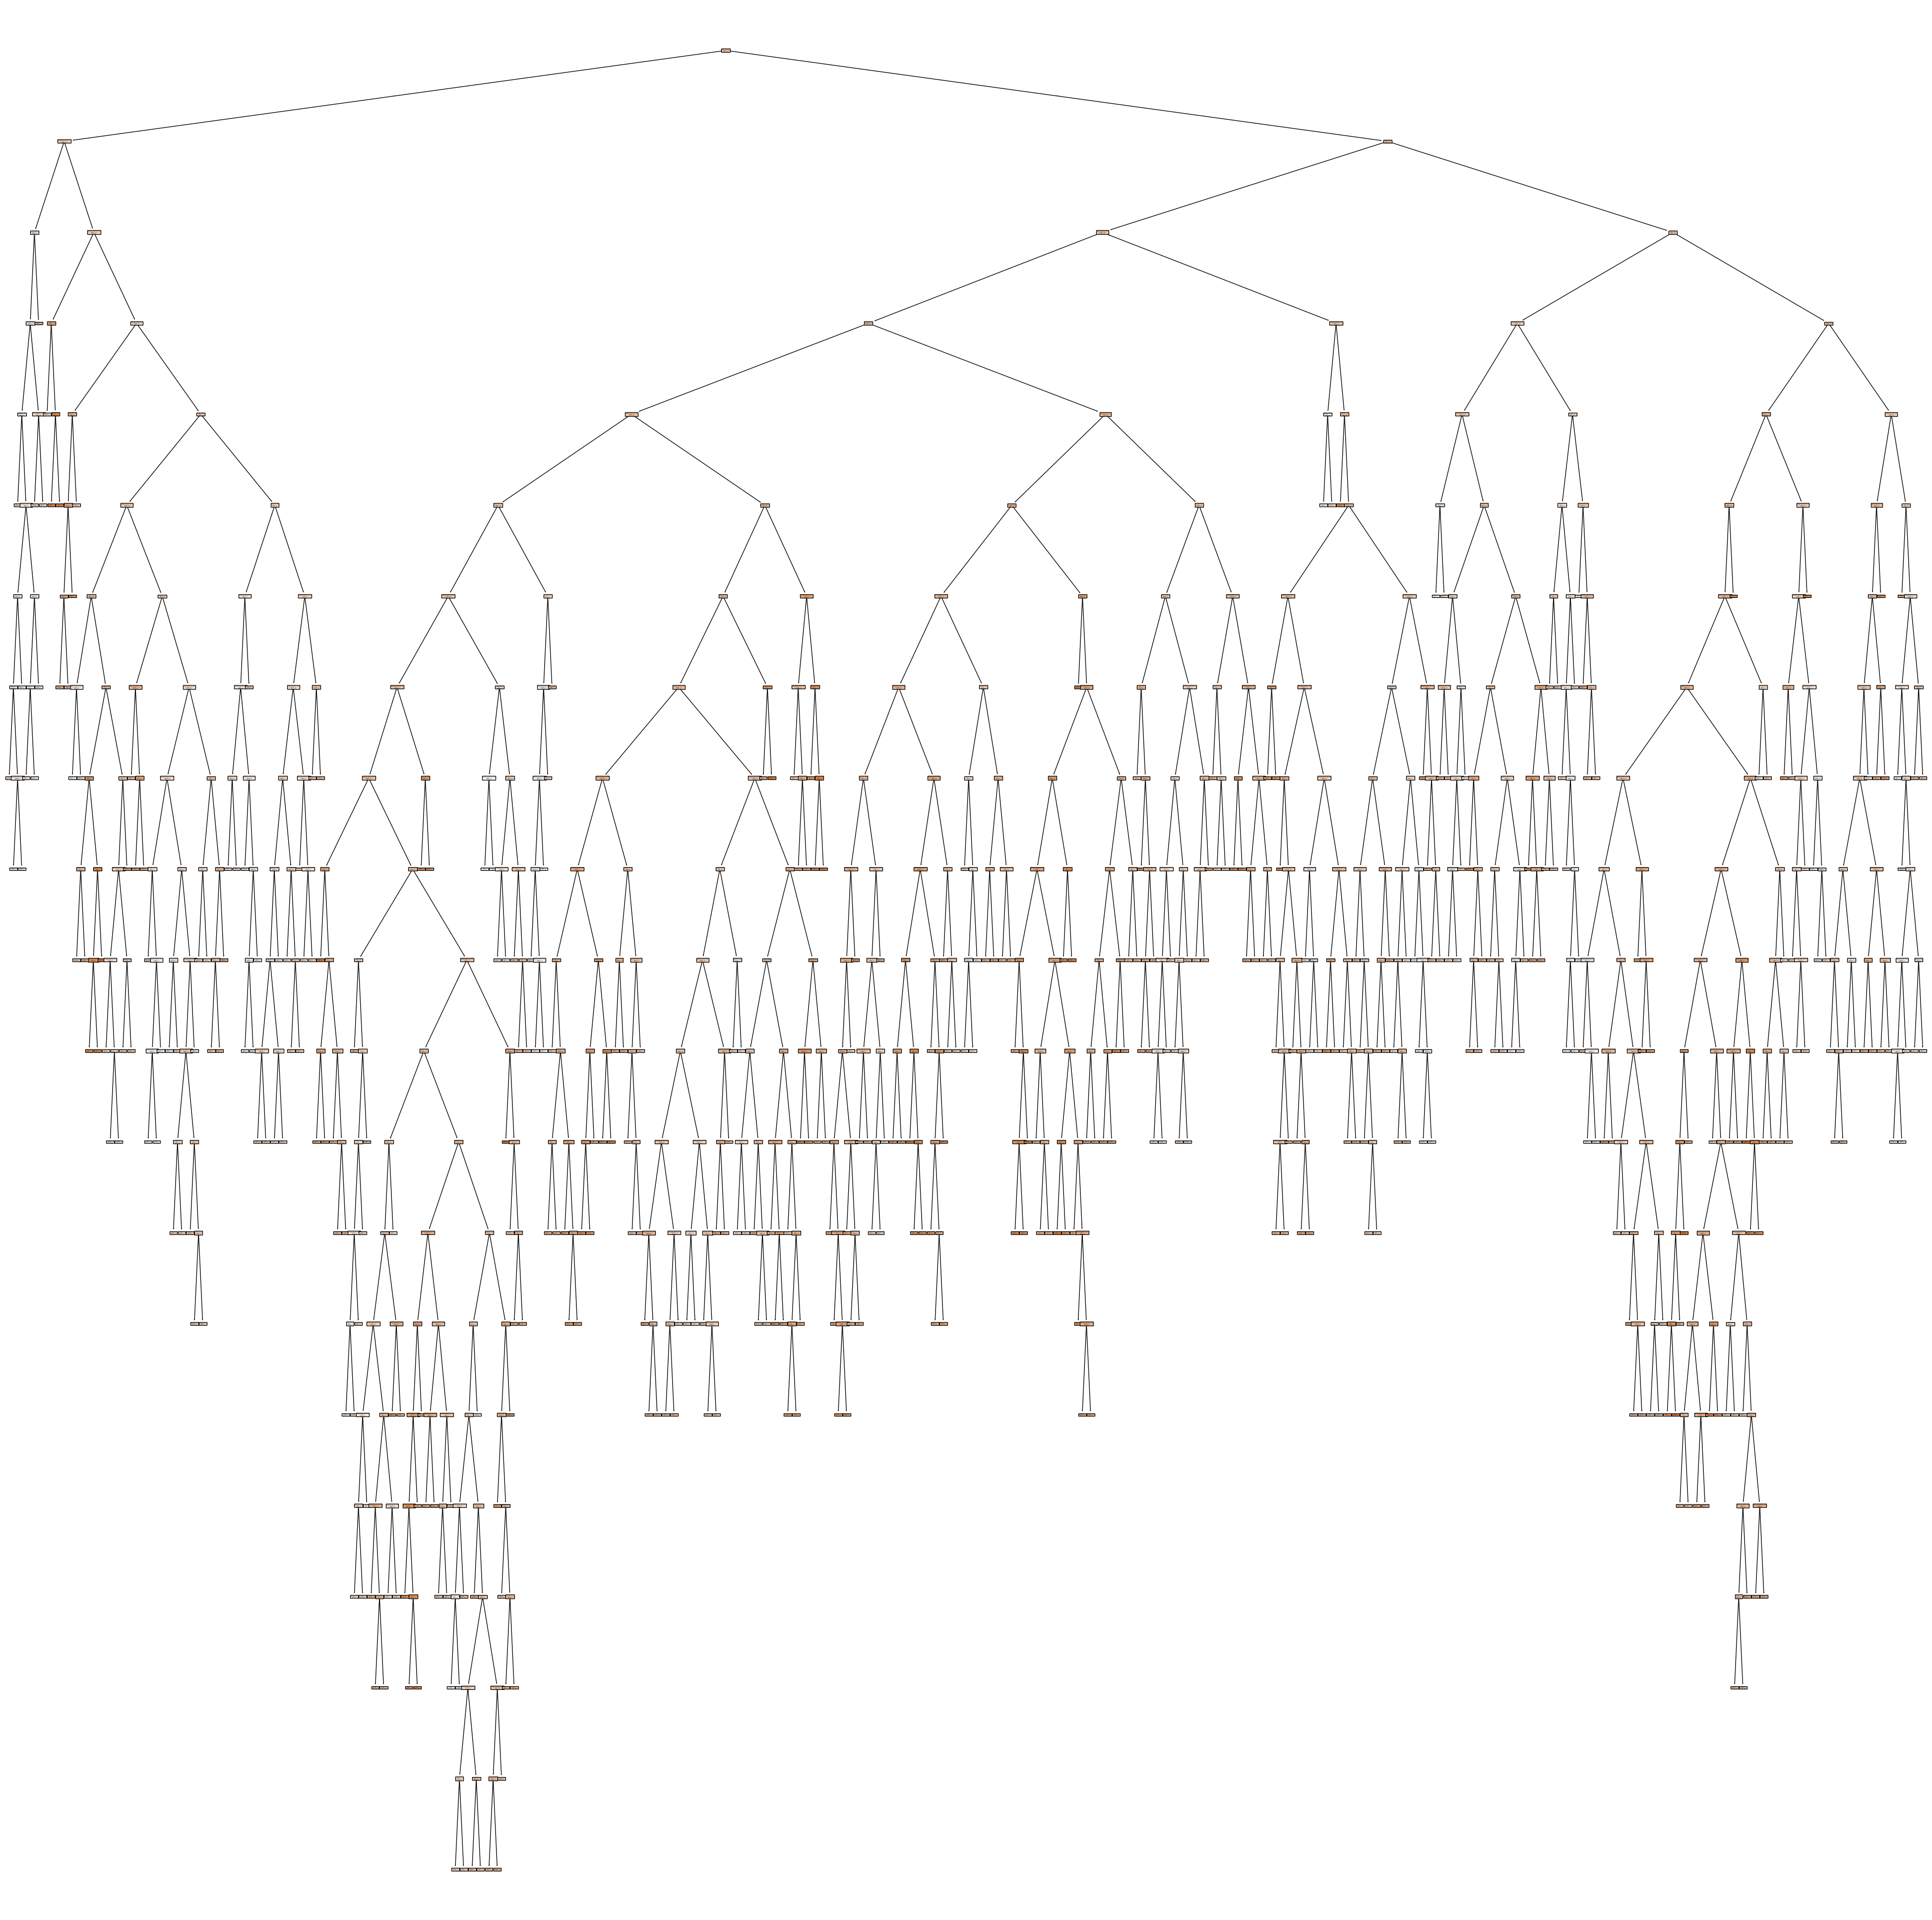

In [ ]:
# Import necessary libraries
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the regression Decision Tree model (DT1_regressor)
# Set the figure size for better visibility of the full tree
DT1_Tree_model = plt.figure(figsize=(50, 50))

# Plot the tree using the training features' names and fill the nodes with colors based on values
DT1_Tree_model_Graph = tree.plot_tree( DT1_regressor, feature_names=list(X_train.columns), filled=True)

# Save the plotted decision tree as a image file
DT1_Tree_model.savefig("dt1_decision_tree.png")

In [ ]:
# Limit the tree growth to a maximum of 4 levels to prevent overfitting
DT2_regressor = DecisionTreeRegressor(max_depth=4)

# Train the limited depth Decision Tree Regressor using the training data
DT2_regressor.fit(X_train, y_train)

# Make predictions on the test set using the trained DT2 model
y_pred_dt2 = DT2_regressor.predict(X_test)

In [ ]:
# DT-2 model performance

# Calculate and print the Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt2))

# Calculate and print the Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt2))

# Calculate and print the R-squared (R2) score to measure goodness of fit
print('R2:', metrics.r2_score(y_test, y_pred_dt2))

MAE: 0.20168686889158213
MSE: 0.06204548960264598
R2: 0.022127009350010884


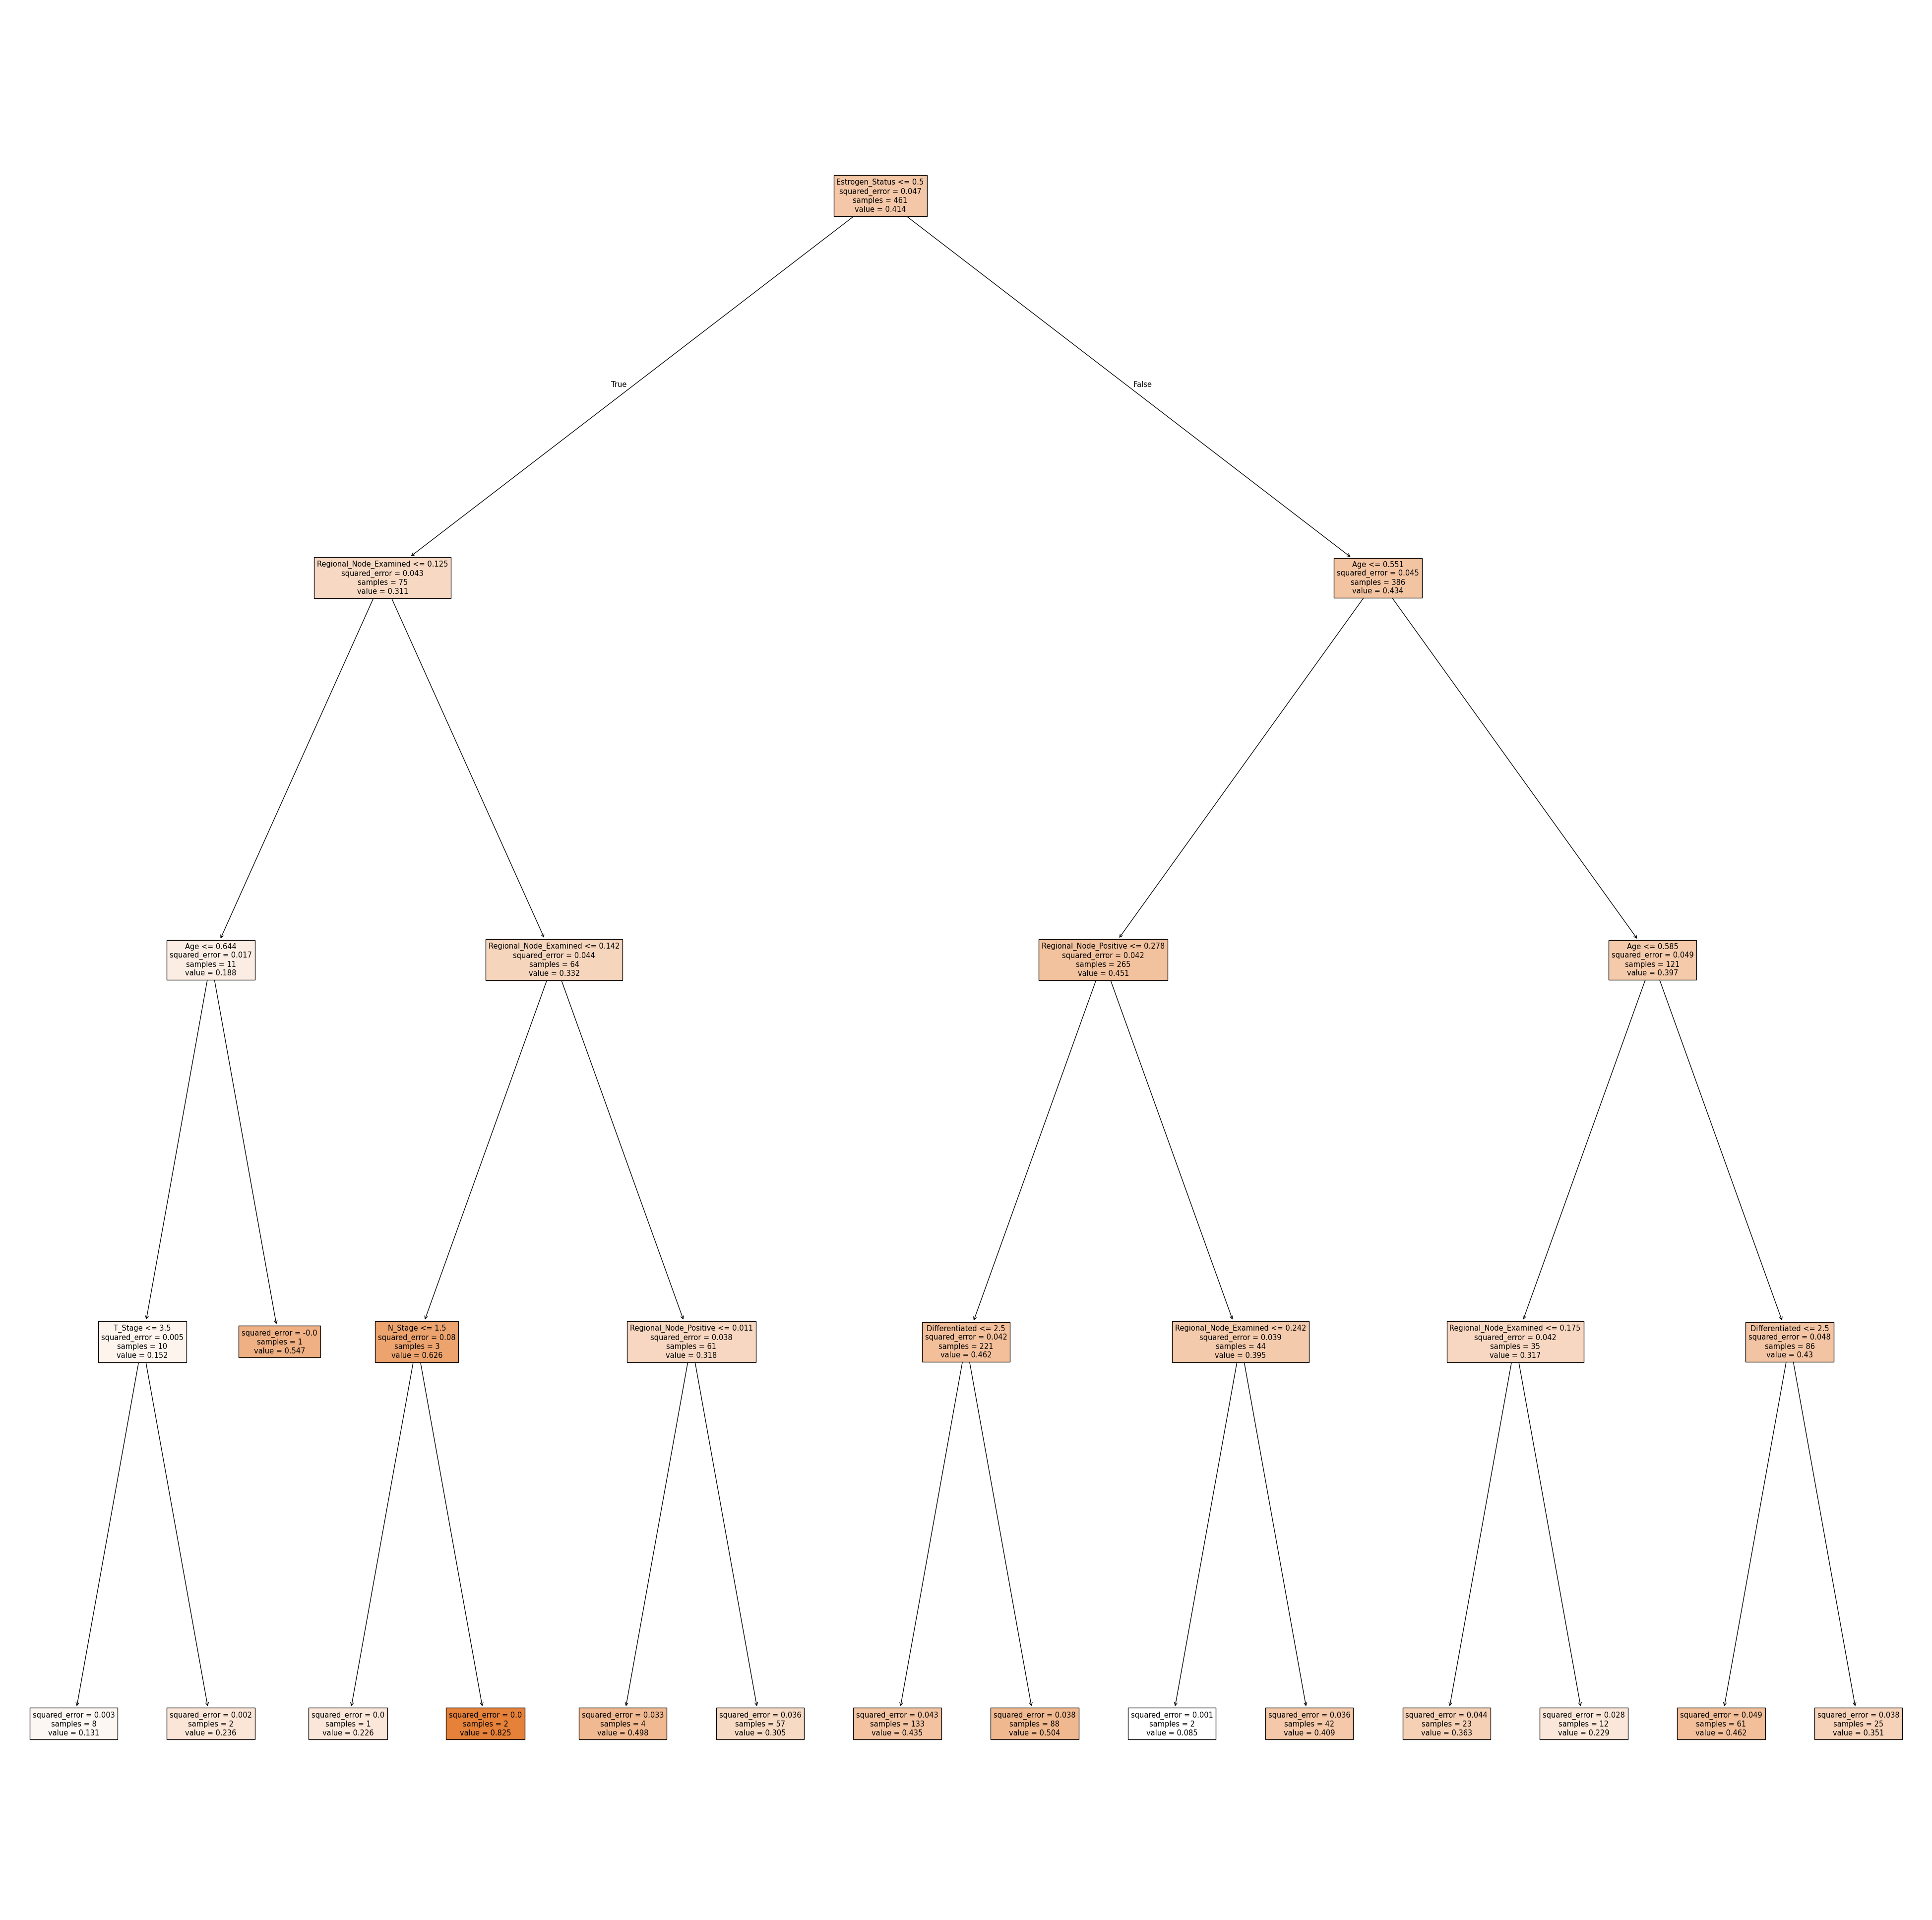

In [ ]:
# Create a large figure for visualizing the pruned regression decision tree
pruned_tree_fig = plt.figure(figsize=(50, 50))

# Plot the tree with feature names and filled colors for better readability
pruned_tree_graph = tree.plot_tree(DT2_regressor, feature_names=list(X_train.columns), filled=True)

# Save the plotted decision tree as a image
pruned_tree_fig.savefig("pruned_regression_tree_visualization.png")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the regression dataset from the specified path
regression_df = pd.read_csv('/content/5DATA002W.2 Coursework Dataset(25012025v6.0) fixed.csv')

# Define the numerical columns that require standardization
numerical_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive']

# Initialize the standard scaler
scaler = MinMaxScaler()

# Fit the scaler on the selected numerical columns in the dataset
scaler.fit(regression_df[numerical_cols])

# Create a DataFrame for a new patient's data with known features
patient_data = pd.DataFrame([{
    'Age': 29,
    'Sex': 0,
    'T_Stage': 3,
    'N_Stage': 1,
    '6th_Stage': 2,
    'Differentiated': 0,
    'Grade': 2,
    'A_Stage': 1,
    'Tumor_Size': 41,
    'Estrogen_Status': 0,
    'Progesterone_Status': 1,
    'Regional_Node_Examined': 5,
    'Regional_Node_Positive': 1
}])

# Apply the previously fitted scaler to normalize the patient's numerical data
patient_data[numerical_cols] = scaler.transform(patient_data[numerical_cols])

# Display the scaled numerical values for the patient
print(patient_data[numerical_cols])

        Age  Tumor_Size  Regional_Node_Examined  Regional_Node_Positive
0  0.143116    0.539535                0.066667                     0.0


In [ ]:
# Make a prediction for the new patient using the pruned Decision Tree model
patient = DT2_regressor.predict(patient_data)

# Print the predicted survival months for the patient
print(patient)

[0.13089623]
